<a href="https://colab.research.google.com/github/Niharika-20-MAI-01/Winter-2021-Deep-Learning-LabCSE6037-Niharika-20MAI01/blob/main/20MAI0001__DL_Lab(CSE6037)_VG_16_Model_Implementation_with_the_CIFAR_dataset_Activity_2_Asgn_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DL-Lab-CSE6037_Lab-Assignment-4_Activity-2_Implementation_of_VGG-16_Model_with_the_with_the_CIFAR-dataset

#Submitted By: 20MAI0001 - NIHARIKA MAITRA

git Repo Link :





https://github.com/Niharika-20-MAI-01/Winter-2021-Deep-Learning-LabCSE6037-Niharika-20MAI01/blob/main/20MAI0001__DL_Lab(CSE6037)_VG_16_Model_Implementation_with_the_CIFAR_dataset_Activity_2_Asgn_4.ipynb


In [279]:
#Importing library
import keras
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import Model

In [280]:
np.random.seed(1000)

In [281]:
#Instantiation
vmodel = Sequential()

# Developing / Creating the VGG-16 Model by adding the susequent Convolution Layers to the model :

In [282]:
#1st Convolutional Layer
vmodel.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
vmodel.add(Convolution2D(64, 3, 3, activation='relu'))
vmodel.add(ZeroPadding2D((1,1)))
vmodel.add(Convolution2D(64, 3, 3, activation='relu'))
vmodel.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))


#2nd Convolutional Layer
vmodel.add(ZeroPadding2D((1,1)))
vmodel.add(Convolution2D(128, 3, 3, activation='relu'))
vmodel.add(ZeroPadding2D((1,1)))
vmodel.add(Convolution2D(128, 3, 3, activation='relu'))
vmodel.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))   
        

#Modifying / Improvising the original VGG-16 model by Adding Batch Normalization (after the 1St Convolution Layer) in the 3rd Convolution Layer

In [283]:

#3rd Convolutional Layer
vmodel.add(ZeroPadding2D((1,1)))
vmodel.add(Convolution2D(256, 3, 3, activation='relu'))
vmodel.add(ZeroPadding2D((1,1)))
vmodel.add(Convolution2D(256, 3, 3, activation='relu'))
vmodel.add(BatchNormalization())
vmodel.add(ZeroPadding2D((1,1)))
vmodel.add(Convolution2D(256, 3, 3, activation='relu'))
vmodel.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
   

In [284]:
#4th Convolutional Layer
vmodel.add(ZeroPadding2D((1,1)))
vmodel.add(Convolution2D(512, 3, 3, activation='relu'))
vmodel.add(ZeroPadding2D((1,1)))
vmodel.add(Convolution2D(512, 3, 3, activation='relu'))
vmodel.add(ZeroPadding2D((1,1)))
vmodel.add(Convolution2D(512, 3, 3, activation='relu'))
vmodel.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))


#5th Convolutional Layer
vmodel.add(ZeroPadding2D((1,1)))
vmodel.add(Convolution2D(512, 3, 3, activation='relu'))
vmodel.add(ZeroPadding2D((1,1)))
vmodel.add(Convolution2D(512, 3, 3, activation='relu'))
vmodel.add(ZeroPadding2D((1,1)))
vmodel.add(Convolution2D(512, 3, 3, activation='relu'))
vmodel.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))


In [285]:
 #Passing the model to a Fully Connected layer
 vmodel.add(Flatten())


Adding the susequent Fully connected Layers followed by the Output Layer for developing the VGG-16 Model :

In [286]:
# 1st Fully Connected Layer
vmodel.add(Dense(4096, activation='relu'))
vmodel.add(Dropout(0.5))


#2nd Fully Connected Layer
vmodel.add(Dense(4096, activation='relu'))
vmodel.add(Dropout(0.5))

#Modifying / Improvising the original VGG-16 model by Adding Batch Normalization (after the 1St Convolution Layer) in the Output Layer

In [287]:
#Output Layer
vmodel.add(BatchNormalization())
vmodel.add(Dense(1000, activation='softmax'))

# VGG-16 Model Summary :

In [288]:
#Model Summary
vmodel.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_116 (ZeroPadd (None, 5, 226, 224)       0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 1, 75, 64)         129088    
_________________________________________________________________
zero_padding2d_117 (ZeroPadd (None, 3, 77, 64)         0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 1, 25, 64)         36928     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 1, 13, 64)         0         
_________________________________________________________________
zero_padding2d_118 (ZeroPadd (None, 3, 15, 64)         0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 1, 5, 128)        

#To compile the VGG-16 Model using Optimizer as Stochastic Gradient Descent (SGD) Optimizer : 

In [289]:
# Compiling the model
vmodel.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'sgd', metrics=['accuracy'])

In [290]:
#save the trained model to a file so that it can be used to make predictions later :
vmodel.save("VGG-16_model1.h5")

To Display the first convolution function kernel filter coefficient values (for 25 images) for the VGG-16 Model developed :

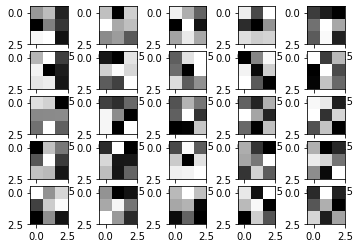

In [291]:
x1w = vmodel.get_weights()[0][:,:,0,:]

for i in range(1,26):

      plt.subplot(5,5,i)

      plt.imshow(x1w[:,:,i],interpolation="nearest",cmap="gray")

plt.show()

To Load the CIFAR dataset from Keras into the developed VGG-16 Model :

In [292]:
#Keras library for CIFAR dataset
from keras.datasets import cifar10

In [293]:
(x_train, y_train),(x_test, y_test)=cifar10.load_data()


To Train-validate-test split the CIFAR dataset on the developed VGG-16 Model :

In [294]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.3,random_state=10)

In [295]:
from sklearn.utils.multiclass import unique_labels
from keras.utils import to_categorical

#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)


To perform Data Augmentation on the CIFAR dataset used to train the developed VGG-16 Model inorder to increase the number of images(data) in the CIFAR dataset used to train the developed VGG-16 Model:

In [296]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True,zoom_range=.1)


In [297]:
#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)


In [298]:
#Learning Rate 
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(   monitor='val_acc',   factor=.01,   patience=3,  min_lr=1e-5)

To Display Sample Input Images :

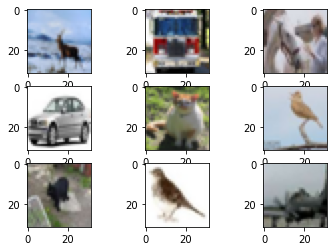

In [299]:
from matplotlib import pyplot
subplots = []
rows = 3
cols = 3
for i in range(9):
	# define subplot
	pyplot.subplot(rows, cols, i+1)
	# plot raw pixel data
	pyplot.imshow(x_train[i])
# show the figure
pyplot.show()

To Display Sample Output Images :

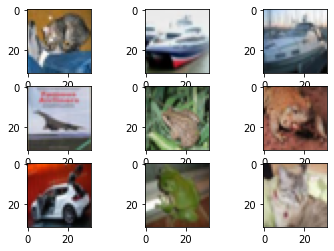

In [300]:
from matplotlib import pyplot
subplots = []
rows1 = 3
cols1 = 3
for i1 in range(9):
	# define subplot
	pyplot.subplot(rows1, cols1, i1+1)
	# plot raw pixel data
	pyplot.imshow(x_test[i1])
# show the figure
pyplot.show()

To Display the total images in the CIFAR dataset :

In [301]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(35000, 10)
(10000, 10)
(15000, 10)


To Display the size of the Images in the CIFAR dataset :

In [302]:
#Dimension of the CIFAR10 dataset
print((x_train.shape,y_train.shape))
print((x_test.shape,y_test.shape))
print((x_val.shape,y_val.shape))

((35000, 32, 32, 3), (35000, 10))
((10000, 32, 32, 3), (10000, 10))
((15000, 32, 32, 3), (15000, 10))


To Display the no of classes in the CIFAR dataset :

In [303]:
Labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [304]:
Labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

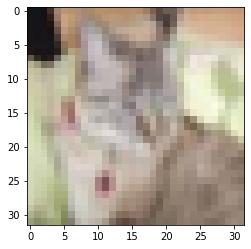

Label :  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [305]:
import matplotlib.pyplot as plt
plt.imshow(x_test[8])
plt.show()

print("Label : ", y_test[8])

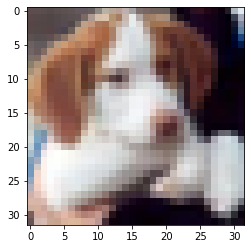

Label :   [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [306]:
import matplotlib.pyplot as plt
plt.imshow(x_test[16])
plt.show()

print("Label :  ", y_test[16])

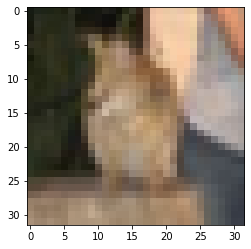

Label :  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [307]:
import matplotlib.pyplot as plt
plt.imshow(x_test[46])
plt.show()

print("Label : ", y_test[46])

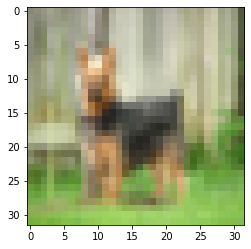

Label :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [308]:
import matplotlib.pyplot as plt
plt.imshow(x_test[24])
plt.show()

print("Label : ", y_test[24])